In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import ScalarFormatter

In [4]:
#read in files
file_path = "../Merge Data Folder/official.csv"

# Read the census data 
df1 = pd.read_csv(file_path)
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,zipcode,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,99556.0,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,99503.0,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,99744.0,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,99559.0,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,99652.0,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282


In [5]:
df1.columns

Index(['State', 'Library ID', 'Submission Year', 'Library Name',
       'Street Address', 'City', 'Zip Code', 'Longitude', 'Latitude',
       'State Code', 'County Code', 'County', 'County Population',
       'Print_Collection_Expenditures', 'Digital_Collection_Expenditures',
       'Total Collection Expenditures', 'Total Operating Expenditures',
       'Print Collection', 'Digital Collection', 'Audio Collection',
       'Library Visits', 'Registered Users', 'Name', 'median_household_income',
       'total_population', 'median_age', 'per_capita', 'education_none',
       'education_high_school', 'education_ged', 'education_associates',
       'education_bachelors', 'education_masters', 'education_professional',
       'education_doctorate', 'state', 'zipcode', 'year',
       'education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'edu

In [6]:
#add registered users columns

df1["reg_users_perc"] = df1["Registered Users"] / df1["total_population"]
df1.head()

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,year,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,2015.0,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,2015.0,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,2015.0,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,2015.0,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,2015.0,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480


# Reported Education Data Analysis

In [7]:
#add education percentage columns

df1["total_edu"] = df1['education_none_perc'] +  df1['education_high_school_perc'] + df1['education_ged_perc'] + df1['education_associates_perc']+df1['education_bachelors_perc'] + df1['education_masters_perc'] +df1['education_professional_perc'] + df1['education_doctorate_perc']
df1.head()
        

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206


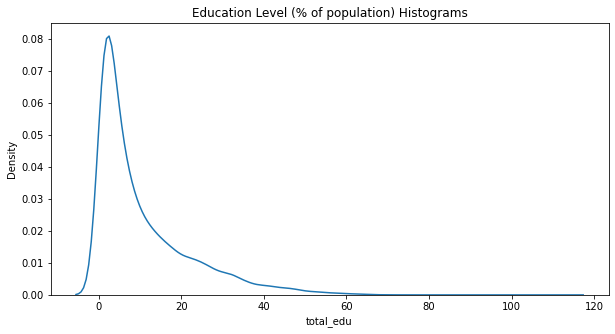

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df1, x="total_edu")
plt.title("Education Level (% of population) Histograms")
plt.show()

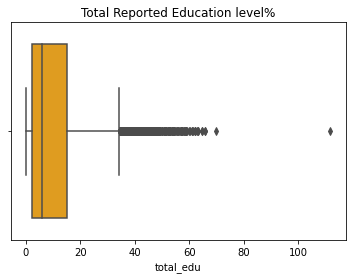

In [9]:
ax = sns.boxplot(x="total_edu", data=df1, color="#FFA600")

plt.title("Total Reported Education level%")

plt.show()

# Drop Outliers

In [10]:
df= df1.copy()

In [11]:
# Reported Education Numbers over total population of area
mask= df.total_edu <= 100
df = df.loc[mask]
df

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000,0.068761,2.529438
9167,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845,0.432948,12.633770
9168,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498,0.307766,10.481340
9169,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000,0.141485,6.769289


In [12]:
# Drop Registered Users under 0%
mask= df1["reg_users_perc"] >0
df= df.loc[mask]
df

,State,Library ID,Submission Year,Library Name,Street Address,City,Zip Code,Longitude,Latitude,State Code,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
0,AK,AK0001,2015,ANCHOR POINT PUBLIC LIBRARY,72551 MILO FRITZ AVENUE,ANCHOR POINT,99556,-151.840007,59.779604,2,...,0.065051,1.210417,0.250912,0.325256,0.511117,0.153335,0.037172,0.011616,0.009200,2.564877
1,AK,AK0002,2015,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,-149.876781,61.187677,2,...,0.472031,5.205152,1.183280,1.371238,2.588693,1.059399,0.395139,0.049125,2.554924,12.324056
2,AK,AK0003,2015,ANDERSON VILLAGE LIBRARY,101 FIRST STREET,ANDERSON,99744,-149.178635,64.343598,2,...,0.000000,0.022803,0.011401,0.019382,0.026223,0.017102,0.000000,0.000000,0.001836,0.096912
3,AK,AK0006,2015,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,-161.802957,60.785755,2,...,0.033158,1.977038,0.451776,0.248684,0.772302,0.285987,0.095329,0.058026,0.020724,3.922300
4,AK,AK0007,2015,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,-149.818403,61.546612,2,...,0.007282,1.117082,0.221377,0.273809,0.471884,0.122340,0.045149,0.007282,0.056480,2.266206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9166,WY,WY0019,2015,SUBLETTE COUNTY LIBRARY,155 S TYLER ST,PINEDALE,82941,-109.861281,42.865097,56,...,0.000000,1.114130,0.103034,0.429121,0.617074,0.235507,0.030571,0.000000,0.068761,2.529438
9167,WY,WY0020,2015,TETON COUNTY LIBRARY,125 VIRGINIAN LANE,JACKSON,83001,-110.779203,43.471780,56,...,0.049372,3.006325,0.517734,0.641830,5.941928,1.885458,0.360279,0.230845,0.432948,12.633770
9168,WY,WY0021,2015,UINTA COUNTY LIBRARY,701 MAIN ST,EVANSTON,82930,-110.963405,41.265975,56,...,0.035921,4.862555,0.949068,1.266684,2.384013,0.661701,0.260899,0.060498,0.307766,10.481340
9169,WY,WY0022,2015,WASHAKIE COUNTY LIBRARY,1019 COBURN AVE,WORLAND,82401,-107.955461,44.015771,56,...,0.087723,2.882326,0.474122,1.063119,1.591545,0.530515,0.139939,0.000000,0.141485,6.769289


In [13]:
df.describe()

,Submission Year,Zip Code,Longitude,Latitude,State Code,County Code,County Population,Print_Collection_Expenditures,Digital_Collection_Expenditures,Total Collection Expenditures,...,education_none_perc,education_high_school_perc,education_ged_perc,education_associates_perc,education_bachelors_perc,education_masters_perc,education_professional_perc,education_doctorate_perc,reg_users_perc,total_edu
count,9158.0,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9.158000e+03,9.158000e+03,9.158000e+03,9.158000e+03,...,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000,9158.000000
mean,2015.0,44652.357283,-87.401738,39.789535,29.994977,80.438087,3.356552e+05,8.058800e+04,2.926657e+04,1.368460e+05,...,0.208978,4.256910,0.758204,1.304415,2.499417,1.078157,0.240255,0.172203,0.407246,10.518537
std,0.0,28172.767327,16.853048,6.257637,14.232656,85.399691,9.005851e+05,3.406765e+05,1.671361e+05,5.996532e+05,...,0.442524,4.874741,1.023870,1.481532,3.063890,1.405093,0.381123,0.369758,1.670193,11.428944
min,2015.0,1001.000000,-170.280072,0.000000,1.000000,1.000000,2.620000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000046,0.007547
25%,2015.0,14892.750000,-95.936673,37.885557,19.000000,21.000000,2.225400e+04,6.072750e+03,0.000000e+00,7.952250e+03,...,0.010418,0.911891,0.108014,0.276805,0.414125,0.148544,0.018883,0.009909,0.023394,2.199874
50%,2015.0,49327.500000,-87.599305,41.091995,31.000000,59.000000,6.341950e+04,1.745100e+04,1.480000e+03,2.403550e+04,...,0.059233,2.381512,0.344425,0.708456,1.191388,0.501729,0.084460,0.051232,0.072248,5.964702
75%,2015.0,66712.750000,-75.969847,42.868330,41.000000,113.000000,2.657290e+05,5.395325e+04,9.985250e+03,8.064075e+04,...,0.213770,5.739185,0.999807,1.833555,3.472736,1.480601,0.300554,0.189038,0.227619,15.106779
max,2015.0,99929.000000,0.000000,71.298460,56.000000,840.000000,1.011670e+07,1.718262e+07,7.390207e+06,2.761352e+07,...,6.841421,41.722166,8.714854,10.657207,23.740241,14.783314,4.853758,9.438945,50.279875,69.926489


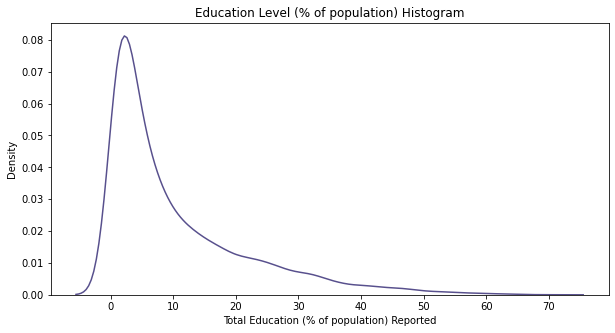

In [14]:
#Education Level (% of population) Histogram
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="total_edu", color="#58508D")
plt.title("Education Level (% of population) Histogram")
plt.xlabel("Total Education (% of population) Reported")
plt.show()

In [15]:
#create seaborn color palette
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
colors = ["#003F5C", "#58508D", "#BC5090", "#FF6361", "#FFA600", "#EC6B56", "#0097a7", "#47B39C"]

# Set your custom color palette
palette = sns.set_palette(sns.color_palette(colors))

percentages= ['education_none_perc', 'education_high_school_perc',
       'education_ged_perc', 'education_associates_perc',
       'education_bachelors_perc', 'education_masters_perc',
       'education_professional_perc', 'education_doctorate_perc']

# General Charts

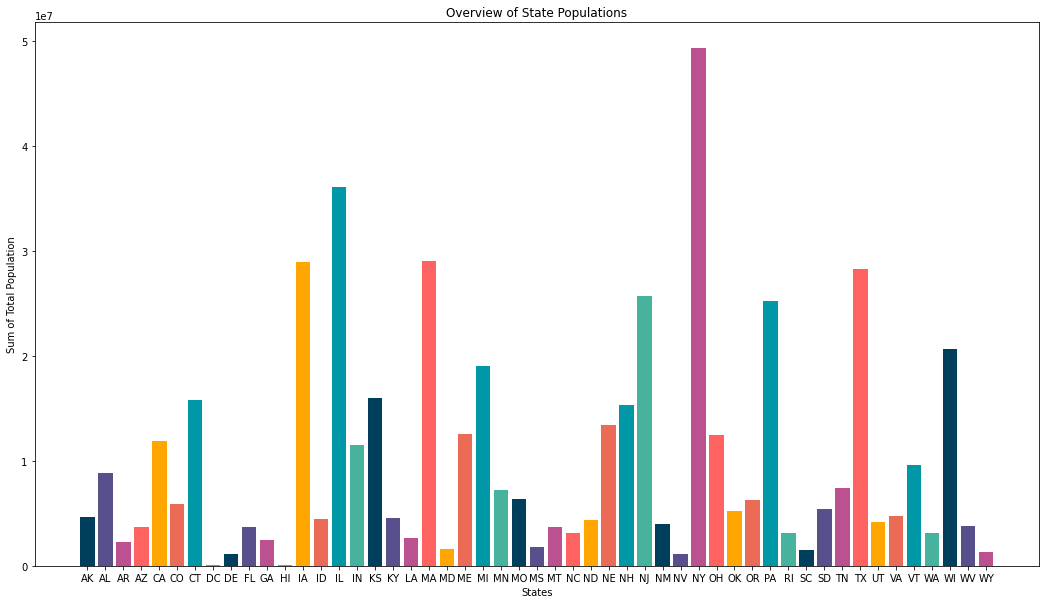

In [16]:
#total population bar chart
states= df.State.unique()
bar= df.groupby("State").total_population.sum()

plt.figure(figsize=(18,10))
plt.bar(states, bar, color=colors)

plt.ylabel("Sum of Total Population")
plt.xlabel("States")
plt.title("Overview of State Populations")
plt.show()

In [17]:
bar

State
AK     4646538.0
AL     8834619.0
AR     2247513.0
AZ     3717163.0
CA    11923772.0
CO     5864830.0
CT    15797899.0
DC       85976.0
DE     1117547.0
FL     3716602.0
GA     2477864.0
HI       64800.0
IA    28898903.0
ID     4463270.0
IL    36055074.0
IN    11511649.0
KS    16004058.0
KY     4528447.0
LA     2681886.0
MA    29026093.0
MD     1593432.0
ME    12547819.0
MI    19071520.0
MN     7243634.0
MO     6398431.0
MS     1803480.0
MT     3653599.0
NC     3129713.0
ND     4392014.0
NE    13428669.0
NH    15271749.0
NJ    25723103.0
NM     3997653.0
NV     1095985.0
NY    49303124.0
OH    12471818.0
OK     5229952.0
OR     6224110.0
PA    25227049.0
RI     3157932.0
SC     1527131.0
SD     5379372.0
TN     7376741.0
TX    28250108.0
UT     4138130.0
VA     4780156.0
VT     9628274.0
WA     3145724.0
WI    20623072.0
WV     3766488.0
WY     1330496.0
Name: total_population, dtype: float64

# heatmap

In [ ]:
#heatmap for education and registered users variables
heatmap = pd.DataFrame()

heatmap["No Degree"] = df["education_none_perc"]
heatmap["High School"] = df["education_high_school_perc"]
heatmap["GED"] = df["education_ged_perc"]
heatmap["Associates"] = df["education_associates_perc"]
heatmap["Bachelors"] = df["education_bachelors_perc"]
heatmap["Masters"] = df["education_masters_perc"]
heatmap["Professional"] = df["education_professional_perc"]
heatmap["Doctorate"] = df["education_doctorate_perc"]
heatmap["Registered Users"] = df["reg_users_perc"]

heatmap.head()

In [ ]:
heatmap.describe()

In [ ]:
#correlation table
corrs =heatmap.corr()
corrs

#show heatmap of correlation table above
sns.heatmap(corrs, cmap=colors)
plt.title("Correlation Heat Map")
plt.show()

# KDE Analysis

In [ ]:
#loop through education columns and produce outliers for review
lower_bounds = []
upper_bounds = []
range_edu =[]

for perc in percentages:

    quartiles = df[perc].quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound= lowerq - (1.5*iqr)
    upper_bound= upperq + (1.5*iqr)
    
    range_edu.append(iqr)
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

    #identify any outliers
    
    mask = (df[perc]> upper_bound) | (df[perc]< lower_bound)
    outlier = df.loc[mask]
    
    #https://datatofish.com/pandas-dataframe-empty/
    #https://www.geeksforgeeks.org/how-to-print-an-entire-pandas-dataframe-in-python/
    if outlier.empty==False:
        print(perc)
        display(outlier)
    else:
        print(f"No outliers for {perc}.")
        



In [ ]:
#KDE analysis
edu_df = pd.DataFrame()
edu_df["Education Level"]= percentages
edu_df["Lower Bound"]= lower_bounds
edu_df["Upper Bound"]= upper_bounds
edu_df["IQR"] = range_edu

edu_df

# histograms

In [ ]:
#education histograms
for perc in percentages:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df, x=perc, color = "#003F5C" )
    plt.title("Education Level (% of population) Histograms")
    plt.show()

In [ ]:
for per in percentages:
    sns.histplot(data=df, x=perc, kde=True)
    plt.show()

# Box and Violin plots

In [ ]:
# graph data in box plots-- outliers shown as diamond
#https://seaborn.pydata.org/generated/seaborn.boxplot.html


for perc in percentages:
    ax = sns.boxplot(x=perc, data=df, color="#003F5C")

    plt.title("Education level%")

    # show plot
    plt.show()
    
    

In [ ]:
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

#combined box plot for education

education_df= pd.DataFrame()
education_df["No Degree"] = df["education_none_perc"]
education_df["High School"] = df["education_high_school_perc"]
education_df["GED"] = df["education_ged_perc"]
education_df["Associates"] = df["education_associates_perc"]
education_df["Bachelors"] = df["education_bachelors_perc"]
education_df["Masters"] = df["education_masters_perc"]
education_df["Professional"] = df["education_professional_perc"]
education_df["Doctorate"] = df["education_doctorate_perc"]
education= pd.melt(education_df)

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", data=education, color=palette)

plt.ylabel("% of Population")
plt.xlabel("Education Level")
plt.title("Education level (%) of Zip Code Population")

plt.show()


In [ ]:
education= pd.melt(heatmap)

plt.figure(figsize=(20,10))
ax = sns.boxplot(x="variable", y="value", data=education)

plt.ylabel("% of Population")
plt.xlabel("")
plt.title("Education level (%) of Zip Code Population")

plt.show()

In [ ]:
#violin plots

for perc in percentages:
    ax = sns.violinplot(x=perc, data=df, color="#FFA600")

    plt.title("Education level %")

    #set axis at 0
    #plt.ylim(0, 80)

    # show plot
    plt.show()
    


In [ ]:
#combined violin plot

plt.figure(figsize=(20,10))
ax = sns.violinplot(x="variable", y="value", data=education)

plt.title("Education level%")

plt.show()

In [ ]:
#Registered Users box plot
ax = sns.boxplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered Users%")

plt.show()

ax = sns.violinplot(x="reg_users_perc", data=df, color="#FFA600")

plt.title("Registered Users (%)")
plt.xlabel("Registered Users")

plt.show()

In [ ]:
ax = sns.violinplot(x="Total Collection Expenditures", data=df, color="#003F5C")

plt.title("Total Collection Expenditure")
plt.xlabel("Total Collection Expenditure")

plt.show()

# linear regression

In [ ]:
#make scatter plot


plt.scatter(df["education_none_perc"], df["reg_users_perc"], color= "#003F5C")
plt.scatter(df["education_high_school_perc"], df["reg_users_perc"], color= "#58508D")
plt.scatter(df["education_ged_perc"], df["reg_users_perc"], color= "#BC5090")
plt.scatter(df["education_associates_perc"], df["reg_users_perc"], color= "#FF6361")
plt.scatter(df["education_bachelors_perc"], df["reg_users_perc"], color= "#FFA600")
plt.scatter(df["education_masters_perc"], df["reg_users_perc"], color= "#EC6B56")
plt.scatter(df["education_professional_perc"], df["reg_users_perc"], color= "#0097a7")
plt.scatter(df["education_doctorate_perc"], df["reg_users_perc"], color= "#47B39C")

plt.legend(percentages)

#axis titles
plt.title('Education Level (% of population) vs Percentage of Registered Users')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Registered Users')


plt.show()

In [ ]:
#linear regression


for perc in percentages:
   
    # Add the linear regression equation and line to plot
    plt.figure(figsize=(8,5))
    x_values = df[perc]
    y_values = df["reg_users_perc"]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, color="#BC5090")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(2, 20),fontsize=15,color="red")
    plt.xlabel(f"{perc} of population of zip code")
    plt.ylabel('% of Registered Users in Zipcode of library')
    plt.title(f'{perc} vs Median Household Income')
    plt.show()

    #predicted vs actual
    plt.figure(figsize=(8,5))
    plt.scatter(y_values, regress_values, color="#58508D") # plot predicted data
    plt.plot(y_values,y_values) # plot a line of actual data
    plt.xlabel("Prediction Value for Education Level %")
    plt.ylabel('% of Registered Users in Zipcode of library')
    plt.title("Predicted vs Actual")
    plt.show()
    
    #https://seaborn.pydata.org/generated/seaborn.residplot.html
    #residual plot
    ax = sns.residplot(x=perc, y="reg_users_perc", data=df, color="#FFA600")
    plt.title("Residual Plot")

In [ ]:
 # STATSMODELS
X = df["education_bachelors_perc"]
X = sm.add_constant(X) # adding a constant

y = df["reg_users_perc"]

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

In [ ]:
X = sm.add_constant(df[percentages])
Y = df.reg_users_perc

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

# ANOVA test

In [ ]:
percentages

In [ ]:
group1= df["education_none_perc"]
group2= df["education_high_school_perc"]
group3= df["education_ged_perc"]
group4= df["education_associates_perc"]
group5= df["education_bachelors_perc"]
group6= df["education_masters_perc"]
group7= df["education_professional_perc"]
group8= df["education_doctorate_perc"]
regusers = df["reg_users_perc"]

In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

In [ ]:
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))
print(stats.ttest_ind(group1, group5, equal_var=False))
print(stats.ttest_ind(group1, group6, equal_var=False))
print(stats.ttest_ind(group1, group7, equal_var=False))
print(stats.ttest_ind(group1, group8, equal_var=False))

print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))
print(stats.ttest_ind(group2, group5, equal_var=False))
print(stats.ttest_ind(group2, group6, equal_var=False))
print(stats.ttest_ind(group2, group7, equal_var=False))
print(stats.ttest_ind(group2, group8, equal_var=False))

print(stats.ttest_ind(group3, group4, equal_var=False))
print(stats.ttest_ind(group3, group5, equal_var=False))
print(stats.ttest_ind(group3, group6, equal_var=False))
print(stats.ttest_ind(group3, group7, equal_var=False))
print(stats.ttest_ind(group3, group8, equal_var=False))

print(stats.ttest_ind(group4, group5, equal_var=False))
print(stats.ttest_ind(group4, group6, equal_var=False))
print(stats.ttest_ind(group4, group7, equal_var=False))
print(stats.ttest_ind(group4, group8, equal_var=False))

print(stats.ttest_ind(group5, group6, equal_var=False))
print(stats.ttest_ind(group5, group7, equal_var=False))
print(stats.ttest_ind(group5, group8, equal_var=False))

print(stats.ttest_ind(group6, group7, equal_var=False))
print(stats.ttest_ind(group6, group8, equal_var=False))

print(stats.ttest_ind(group7, group8, equal_var=False))

In [ ]:
print(stats.ttest_ind(group1, regusers, equal_var=False))

print(stats.ttest_ind(group2, regusers, equal_var=False))

print(stats.ttest_ind(group3, regusers, equal_var=False))

print(stats.ttest_ind(group4, regusers, equal_var=False))

print(stats.ttest_ind(group5, regusers, equal_var=False))

print(stats.ttest_ind(group6, regusers, equal_var=False))

print(stats.ttest_ind(group7, regusers, equal_var=False))

print(stats.ttest_ind(group8, regusers, equal_var=False))

In [ ]:
#create dataframe of results for presentation

ttest= pd.DataFrame()
ttest["Values"]= ["statistic", "p-value"]
ttest["No Education vs Registered Users"]= stats.ttest_ind(group1, regusers, equal_var=False)
ttest["GED vs Registered Users"]= stats.ttest_ind(group2, regusers, equal_var=False)
ttest["High School vs Registered Users"]= stats.ttest_ind(group3, regusers, equal_var=False)
ttest["Associates vs Registered Users"]= stats.ttest_ind(group4, regusers, equal_var=False)
ttest["Bachelors vs Registered Users"]= stats.ttest_ind(group5, regusers, equal_var=False)
ttest["Masters vs Registered Users"]= stats.ttest_ind(group6, regusers, equal_var=False)
ttest["Professional vs Registered Users"]= stats.ttest_ind(group7, regusers, equal_var=False)
ttest["Doctorite vs Registered Users"]= stats.ttest_ind(group8, regusers, equal_var=False)

ttest